In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('house prediction/train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
num_rows,num_cols=df.shape

In [5]:
print(f"dữ liệu bao gồm: {num_rows} dòng và {num_cols} cột")

dữ liệu bao gồm: 1460 dòng và 81 cột


In [6]:
have_duplicated=df.duplicated().any()
print(have_duplicated)

False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
def open_objects_dtype(s):
    df=pd.Series(s)
    a=df.apply(lambda x: type(x)).unique()
    dtypes=set(a)
    return dtypes

In [9]:
objects_key=(df.loc[:,df.dtypes==object]).keys()
print("number of objects column: ",len(objects_key))
for i in objects_key:
    print("type of objects ",i," is ",open_objects_dtype(df[i]))

number of objects column:  43
type of objects  MSZoning  is  {<class 'str'>}
type of objects  Street  is  {<class 'str'>}
type of objects  Alley  is  {<class 'str'>, <class 'float'>}
type of objects  LotShape  is  {<class 'str'>}
type of objects  LandContour  is  {<class 'str'>}
type of objects  Utilities  is  {<class 'str'>}
type of objects  LotConfig  is  {<class 'str'>}
type of objects  LandSlope  is  {<class 'str'>}
type of objects  Neighborhood  is  {<class 'str'>}
type of objects  Condition1  is  {<class 'str'>}
type of objects  Condition2  is  {<class 'str'>}
type of objects  BldgType  is  {<class 'str'>}
type of objects  HouseStyle  is  {<class 'str'>}
type of objects  RoofStyle  is  {<class 'str'>}
type of objects  RoofMatl  is  {<class 'str'>}
type of objects  Exterior1st  is  {<class 'str'>}
type of objects  Exterior2nd  is  {<class 'str'>}
type of objects  MasVnrType  is  {<class 'str'>, <class 'float'>}
type of objects  ExterQual  is  {<class 'str'>}
type of objects  Exter

In [10]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum().sort_values(ascending=False))
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique().sort_values(ascending=False))

Shape of the dataset:  (1460, 81)
_______________________________________
Number of null values: 
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64
_______________________________________
Number of unique values: 
Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Street           2
CentralAir       2
Utilities        2
Alley            2
Length: 81, dtype: int64


In [11]:
print("% of null values: ")
for i in df.columns:
    if df[i].isnull().any():
        print(i,"---------",df[i].isnull().sum()*100/df.shape[0],"%")
print("_______________________________________")
print("% of unique values: ")
for i in df.columns:
        print(i,"---------",df[i].nunique()*100/df.shape[0],"%")

% of null values: 
LotFrontage --------- 17.73972602739726 %
Alley --------- 93.76712328767124 %
MasVnrType --------- 0.547945205479452 %
MasVnrArea --------- 0.547945205479452 %
BsmtQual --------- 2.5342465753424657 %
BsmtCond --------- 2.5342465753424657 %
BsmtExposure --------- 2.6027397260273974 %
BsmtFinType1 --------- 2.5342465753424657 %
BsmtFinType2 --------- 2.6027397260273974 %
Electrical --------- 0.0684931506849315 %
FireplaceQu --------- 47.26027397260274 %
GarageType --------- 5.5479452054794525 %
GarageYrBlt --------- 5.5479452054794525 %
GarageFinish --------- 5.5479452054794525 %
GarageQual --------- 5.5479452054794525 %
GarageCond --------- 5.5479452054794525 %
PoolQC --------- 99.52054794520548 %
Fence --------- 80.75342465753425 %
MiscFeature --------- 96.3013698630137 %
_______________________________________
% of unique values: 
Id --------- 100.0 %
MSSubClass --------- 1.0273972602739727 %
MSZoning --------- 0.3424657534246575 %
LotFrontage --------- 7.5342465753

In [12]:
df[df["PoolQC"].isnull()==False]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [13]:
df[(df["Alley"].isnull()==False) & (df["PoolQC"].isnull()==False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
df[(df["Alley"].isnull()==True) & (df["PoolQC"].isnull()==True)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
cols_drop=["Alley","PoolQC","Fence","MiscFeature"]


In [16]:
df.drop(columns=cols_drop,inplace=True)

In [17]:
list_null_cols=df.columns[df.isnull().any()].tolist()


In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_filter_null=df[list_null_cols]

In [31]:
df_filter_null_num=df_filter_null.select_dtypes(include=numerics)

In [32]:
list_null_cols_num=df_filter_null_num.columns.tolist()
list_null_cols_num

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

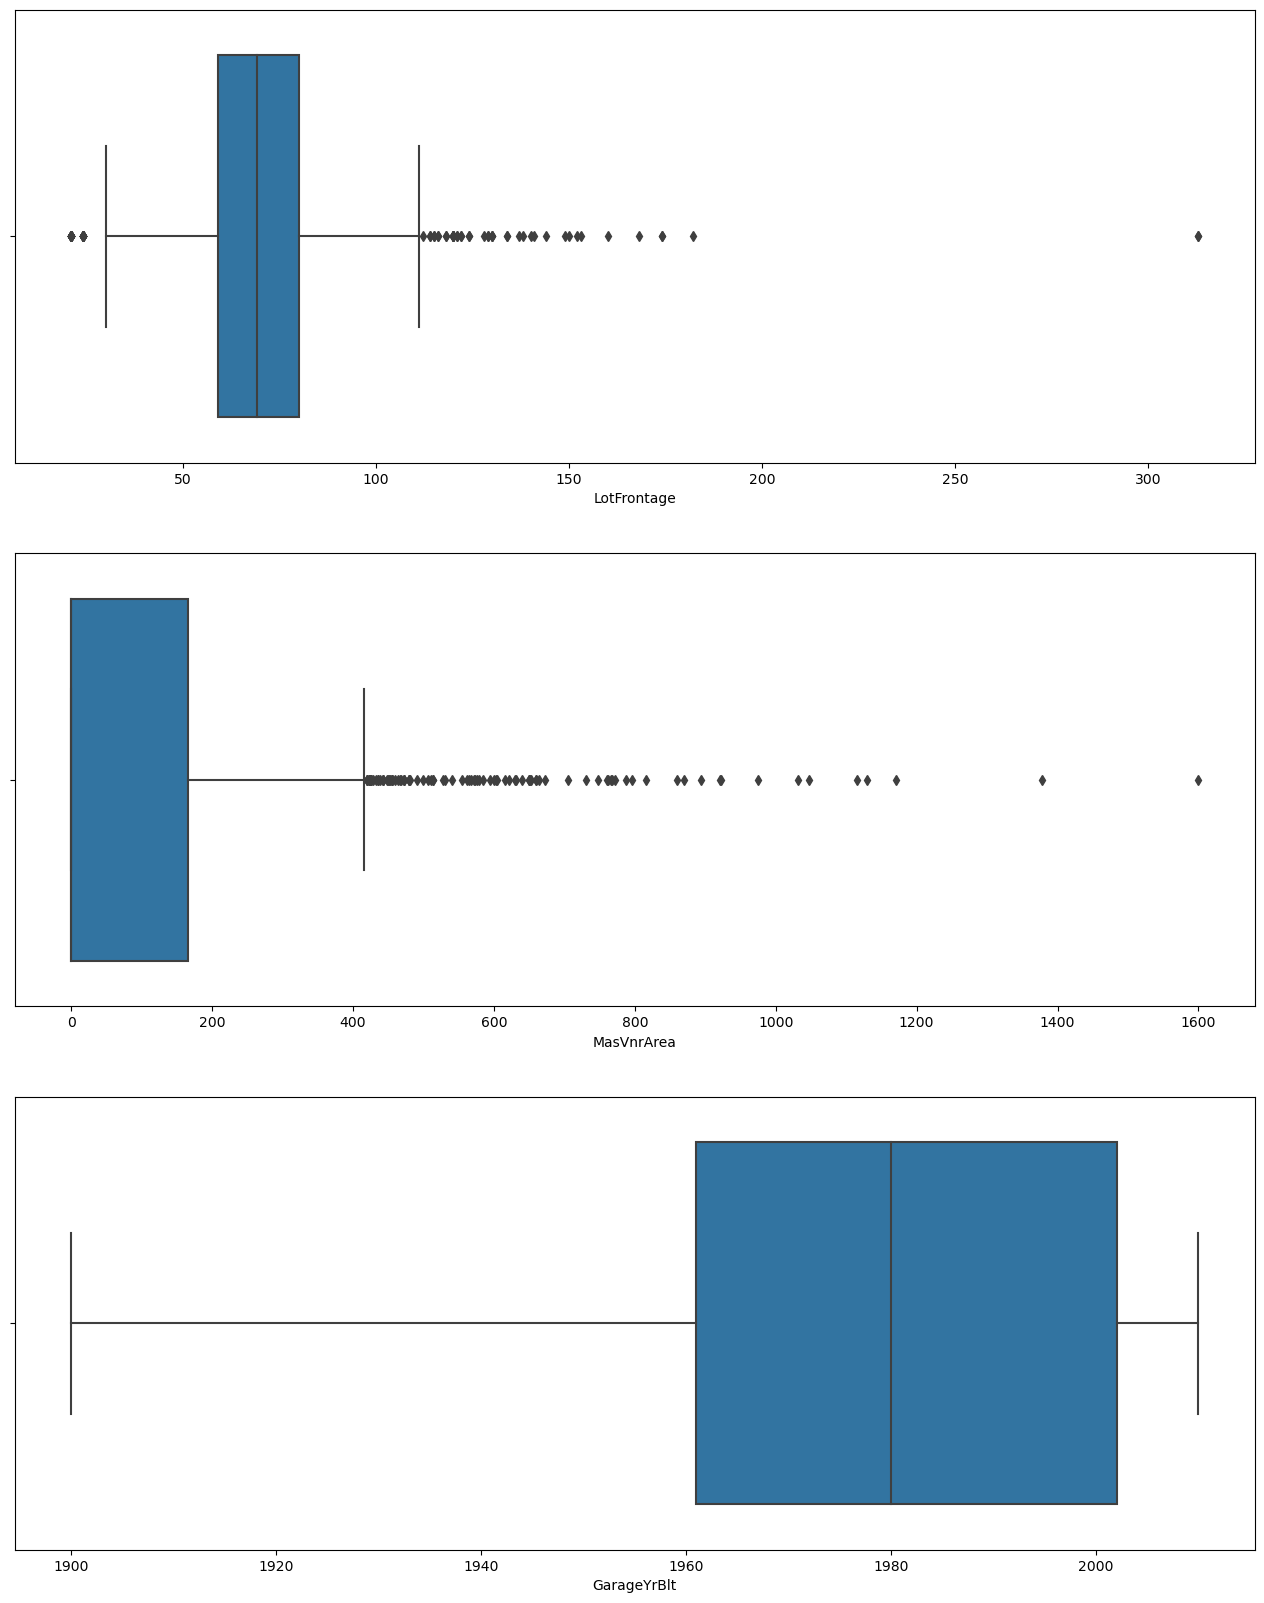

In [37]:
i=0
#j=0
rows=3
cols=1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
for col in list_null_cols_num:
    sns.boxplot(ax=axes[i],data=df,x=col)
    i=i+1
plt.show()

C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LAP12988-local\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

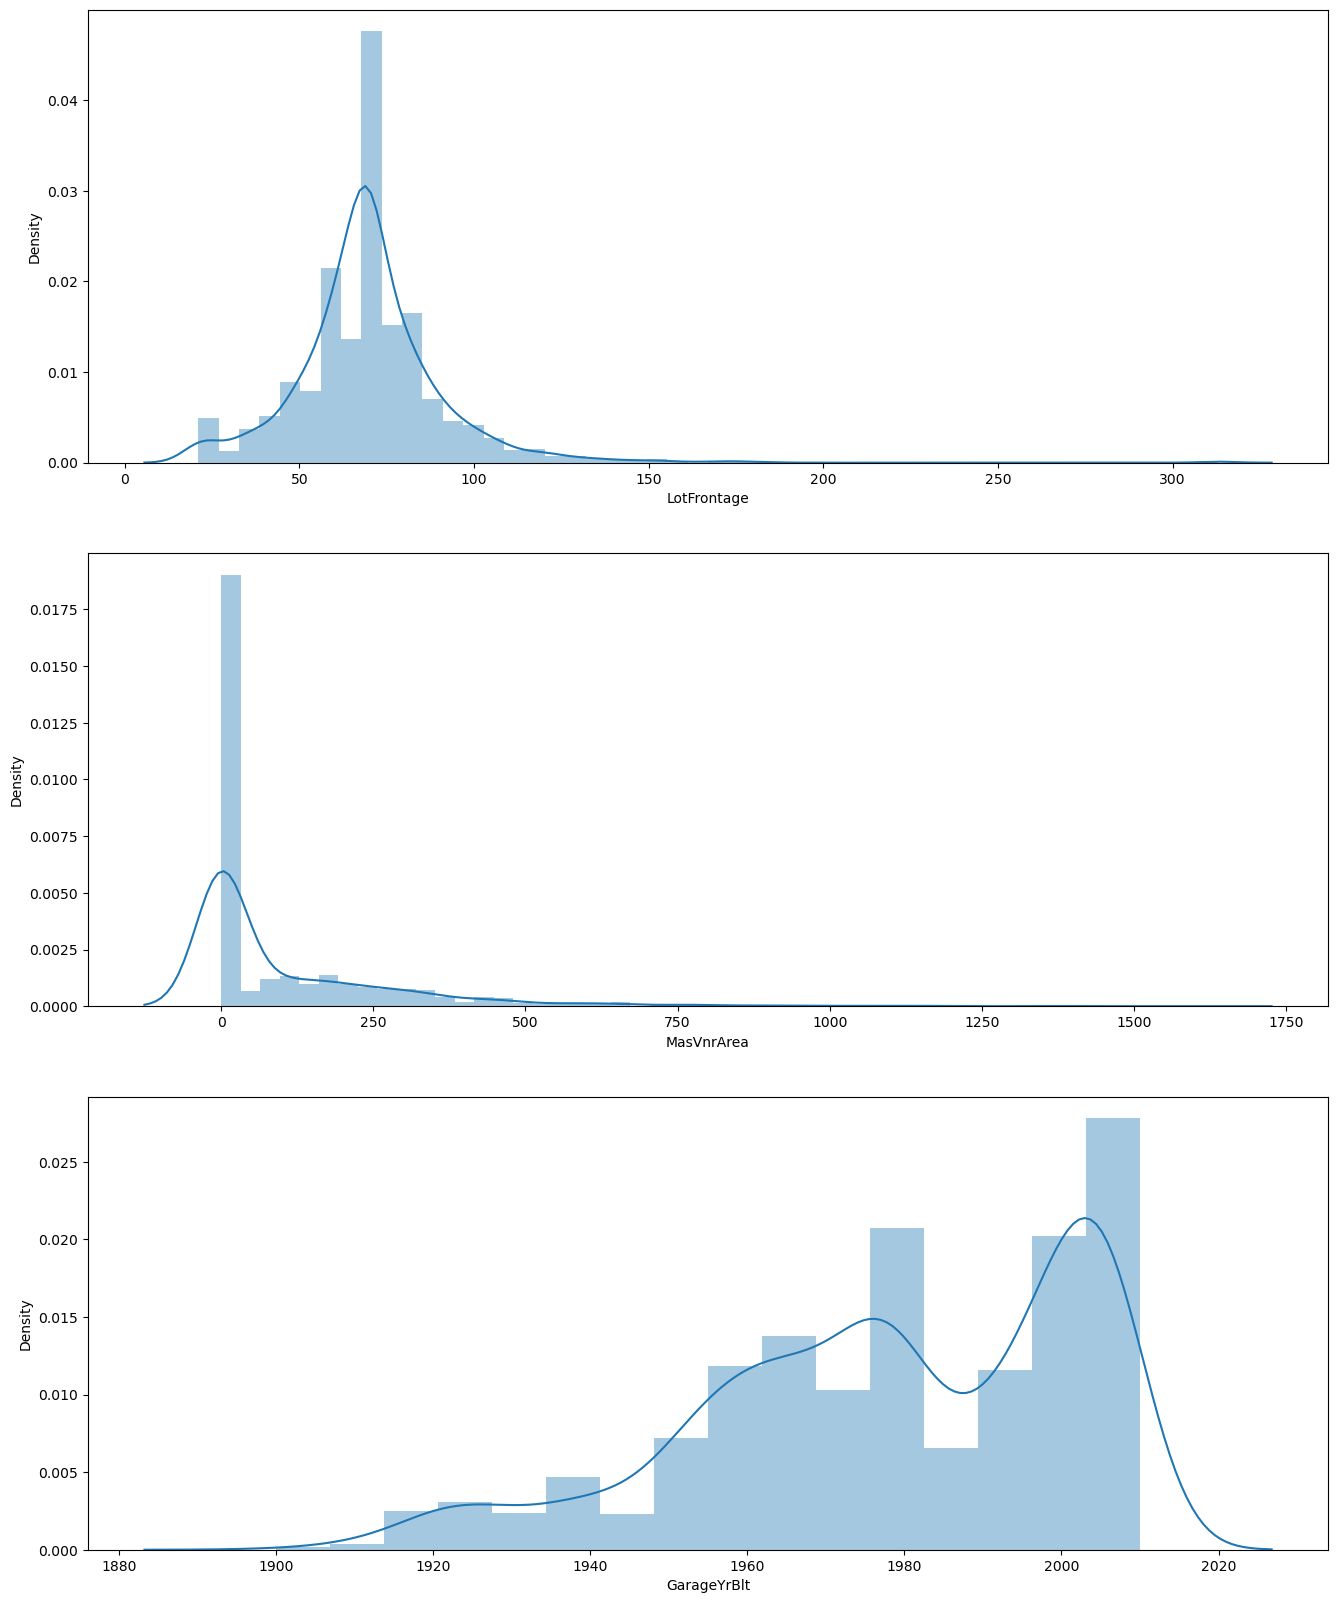

In [39]:
i=0
#j=0
rows=3
cols=1
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize = (16,20))
for col in list_null_cols_num:
    sns.distplot(df[col],ax=axes[i])
    i=i+1
plt.show()

In [38]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea']  = df['MasVnrArea'].fillna(df['MasVnrArea'].median())     
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

In [41]:
list_null_cols_category=list(set(list_null_cols)-set(list_null_cols_num))

In [42]:
list_null_cols_category

['BsmtCond',
 'GarageType',
 'GarageCond',
 'BsmtExposure',
 'MasVnrType',
 'Electrical',
 'BsmtFinType1',
 'GarageFinish',
 'BsmtFinType2',
 'FireplaceQu',
 'BsmtQual',
 'GarageQual']

In [45]:
for cols in list_null_cols_category:
    df[cols]=df[cols].fillna(df[cols].mode()[0])

In [46]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [47]:
df.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [48]:
corr=df.corr()
high_corr_features=corr.index[abs(corr['SalePrice']) > 0.5] 
print(high_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


C:\Users\LAP12988-local\AppData\Local\Temp\ipykernel_22384\3519208186.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


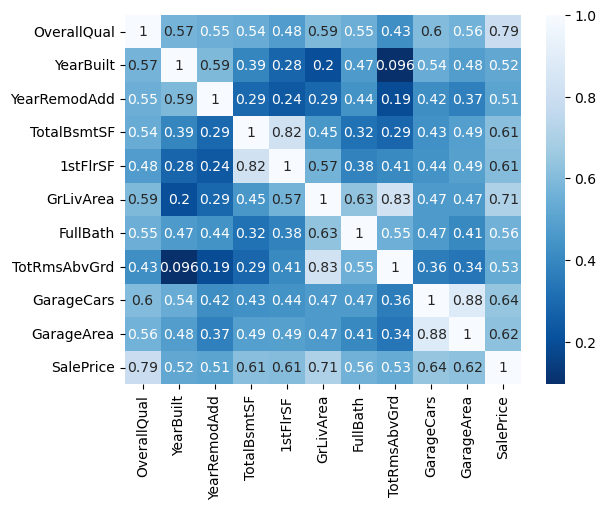

In [52]:
sns.heatmap(data=df[high_corr_features].corr(), annot=True, cmap='Blues_r')
plt.show()